In [27]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'yawn-eye-dataset-new:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F762074%2F1315164%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240310%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240310T071827Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da2c8e6bf72465fd79a7094ba60001bf4c6db52a0d6de15844eb7ebba295fedde0169582db1ef6547ed7a19c2dfc3dceee8b1ded6ef76a4af8ea692860162f00b097800925f8b0549d7cfbfe4ceef6c3d900e0d4e07a164330fc7cb82a4a440999820d3ad31b3a12f99a7747a546d6eaf485aea33851b4e175ff9265c6725742de43dfde87092848cec1d98e65bb664afb0822db0fe5274c6ce23cb9cde2950044daab7449c64a50cdcbcf05fabfa62cb62a5d763aa1b8e590d9d6b44f8d54f033c93bd422af2bcc3276b1bd63b14c370ca3c256b8ab9d447b4fed513bee4dae50d52cceaf2ed523180b7fda3722b3d629e6aa391b86a8b019bd591f5e36e8340'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 168872039 bytes downloaded
Downloaded and uncompressed: yawn-eye-dataset-new
Data source import complete.


In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/281.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/389.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/670.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/209.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/683.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/215.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/428.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/378.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/166.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/76.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/323.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/113.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/391.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/423.jpg
/kaggle/input/yawn-eye-dataset-new/dataset_new/train/yawn/97.jpg
/kaggle/inpu

In [46]:
import numpy as np
from tensorflow.keras.applications import mobilenet, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model, Input, Sequential, layers, callbacks

In [54]:
train_generator = ImageDataGenerator(preprocessing_function=mobilenet.preprocess_input, horizontal_flip=True)
test_generator = ImageDataGenerator(preprocessing_function=mobilenet.preprocess_input)

In [55]:
train_gen = train_generator.flow_from_directory(directory="/kaggle/input/yawn-eye-dataset-new/dataset_new/train", target_size=(224, 224))
test_gen = train_generator.flow_from_directory(directory="/kaggle/input/yawn-eye-dataset-new/dataset_new/test", target_size=(224, 224))

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [56]:
baseline_model = MobileNet(weights="imagenet", include_top=False)

baseline_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizati  (None, None, None, 32)    128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, None, None, 32)    288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, None, None, 

In [57]:
baseline_model.trainable = False

In [58]:
from tensorflow.keras import regularizers

model = Sequential([
    Input(shape=(224, 224, 3)),
    baseline_model,
    layers.Flatten(),
    layers.Dense(units=1024, activation="relu", kernel_regularizer=regularizers.L1L2()),
    layers.Dense(units=4, activation="softmax", name="output_layer")
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, None, None, 1024   3228864   
 onal)                       )                                   
                                                                 
 flatten_5 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              51381248  
                                                                 
 output_layer (Dense)        (None, 4)                 4100      
                                                                 
Total params: 54614212 (208.34 MB)
Trainable params: 51385348 (196.02 MB)
Non-trainable params: 3228864 (12.32 MB)
_________________________________________________________________


In [59]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [60]:
history = model.fit(train_gen,
                    validation_data=test_gen,
                    epochs=20,
                    callbacks=[callbacks.ReduceLROnPlateau(patience=2),
                               callbacks.EarlyStopping(patience=5),
                               callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/Projects/Data science projects/model/yawn_eye_detector.h5", save_best_only=True)])

Epoch 1/20
78/78 [==============================] - 20s 231ms/step - loss: 5.2074 - accuracy: 0.8464 - val_loss: 1.4867 - val_accuracy: 0.9169 - lr: 0.0010
Epoch 2/20
78/78 [==============================] - 11s 143ms/step - loss: 0.6606 - accuracy: 0.9404 - val_loss: 1.9807 - val_accuracy: 0.8891 - lr: 0.0010
Epoch 3/20
78/78 [==============================] - 18s 226ms/step - loss: 0.6670 - accuracy: 0.9684 - val_loss: 0.1362 - val_accuracy: 0.9792 - lr: 0.0010
Epoch 4/20
78/78 [==============================] - 16s 204ms/step - loss: 0.0906 - accuracy: 0.9899 - val_loss: 0.0520 - val_accuracy: 0.9769 - lr: 0.0010
Epoch 5/20
78/78 [==============================] - 11s 145ms/step - loss: 0.1830 - accuracy: 0.9870 - val_loss: 0.2990 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 6/20
78/78 [==============================] - 11s 137ms/step - loss: 0.1382 - accuracy: 0.9797 - val_loss: 0.0681 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 7/20
78/78 [==============================] - 9s 118ms/ste

<Axes: >

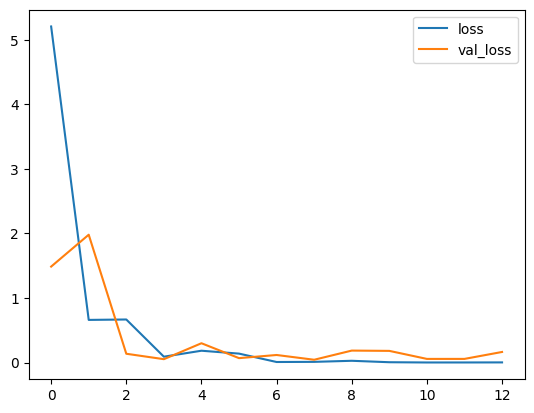

In [61]:
import pandas as pd

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()

<Axes: >

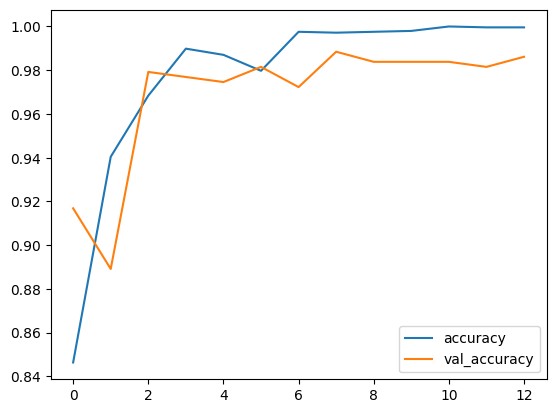

In [62]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
